In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math

import warnings
warnings.filterwarnings('ignore')

## Loading the data path

In [2]:
with open(r"E:\Learning\TEAI Cup\Data\Parquet Data\latest_data.json", 'r') as f:
    latest_data = json.load(f)
    d1_path = latest_data['d1']
    d2_path = latest_data['d2']
    d3_path = latest_data['d3']

## Loading the actual data using data paths

In [3]:
d1 = pd.read_parquet(d1_path)
d2 = pd.read_parquet(d2_path)
d3 = pd.read_parquet(d3_path)

# Lets try matching all 3 datas using Timestamp, Machine Id

In [19]:
sample = d1.sample()
machine_id = sample.machine_id.values[0]
start_time = pd.to_datetime(sample.machine_event_start_timestamp.values[0])
end_time = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0])
part_number = sample.part_number.values[0]
tool_number = sample.tool_number.values[0]

print(f"Machine ID: {machine_id} \nStart Time: {start_time} \nEnd Time: {end_time} \nPart Number: {part_number} \nTool Number: {tool_number}")

Machine ID: S-276 
Start Time: 2025-12-05 08:33:52 
End Time: 2025-12-05 08:52:30 
Part Number: 7-1452668-3 
Tool Number: S1829585


In [20]:
small_d2 = d2[(d2.timestamp >= start_time) & (d2.timestamp <= end_time) & (d2.machine_id == machine_id)]
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,range,outside_range_count,max_deviation
13497,S-276,l-tstelleBody,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 08:33:55,-1.00,1.00,2.00,2.000,2.000,2.00000,0.000,100.0,0.000
13498,S-276,l-tstelleFeder,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...",2025-12-05 08:33:55,-1.00,1.00,2.00,2.000,2.000,2.00000,0.000,100.0,0.000
13499,S-276,gapRechts,"0.392,0.388,0.39,0.394,0.389,0.39,0.394,0.392,...",2025-12-05 08:33:55,-0.05,0.01,0.41,0.382,0.402,0.39107,0.020,100.0,0.028
13500,S-276,sp2DlErkennungErgebnis,"31483.266,36198.833,34867.911,34457.705,32594....",2025-12-05 08:33:55,-0.10,55000.00,0.00,29047.915,38164.534,33528.12606,9116.619,0.0,38164.534
13501,S-276,iDeformationFeder,"55.531,55.93,58.908,58.217,55.385,58.15,55.106...",2025-12-05 08:33:55,-25.00,25.00,50.00,51.330,61.235,56.13108,9.905,100.0,11.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24504,S-276,iFreischnittLamelleUnten,"47.789,47.158,47.958,48.337,45.726,45.726,44.0...",2025-12-05 08:52:27,-25.00,25.00,50.00,42.863,50.189,46.22737,7.326,100.0,7.137
24505,S-276,iDeformationFeder,"54.388,58.124,54.667,54.441,53.444,54.813,55.2...",2025-12-05 08:52:27,-25.00,25.00,50.00,48.273,62.564,55.41611,14.291,100.0,12.564
24506,S-276,gapLinks,"0.391,0.386,0.392,0.381,0.38,0.381,0.373,0.377...",2025-12-05 08:52:27,-0.05,0.01,0.41,0.365,0.392,0.37883,0.027,100.0,0.045
24507,S-276,iFreischnittLamelleOben,"54.214,55.516,54.159,57.822,56.439,57.008,58.7...",2025-12-05 08:52:27,-25.00,25.00,50.00,52.260,61.350,57.99640,9.090,100.0,11.350


In [21]:
# Lets check if there is errors in this and present in the final dataset d3
small_d3 = d3[(d3.timestamp >= start_time) & (d3.timestamp <= end_time) & (d3.machine_id == machine_id) & (d3.part_number == part_number)]
small_d3

,machine_id,machine_status_active_code,timestamp,part_number,error_variable,curr,ltl,utl
916,S-276,200,2025-12-05 08:36:09,7-1452668-3,SP 1 durchgebrannt GW 70,55.676,0.00,45.00
917,S-276,200,2025-12-05 08:37:10,7-1452668-3,I-Kasten hinten,1.884,1.78,1.88
918,S-276,200,2025-12-05 08:37:11,7-1452668-3,I-Kasten SP2,1.888,1.78,1.88
919,S-276,200,2025-12-05 08:38:30,7-1452668-3,SP 1 durchgebrannt GW 70,46.847,0.00,45.00
920,S-276,200,2025-12-05 08:39:47,7-1452668-3,I-Kasten mitte deformiert,1.894,1.78,1.88
921,S-276,200,2025-12-05 08:39:53,7-1452668-3,I-Kasten mitte deformiert,1.939,1.78,1.88
923,S-276,200,2025-12-05 08:41:24,7-1452668-3,I-Kasten hinten,1.889,1.78,1.88
924,S-276,200,2025-12-05 08:41:25,7-1452668-3,I-Kasten SP2,1.890,1.78,1.88
925,S-276,200,2025-12-05 08:43:47,7-1452668-3,GAP rechts,0.359,0.36,0.42
926,S-276,200,2025-12-05 08:48:52,7-1452668-3,I-Freischnitt Lamelle oben,91.577,25.00,75.00


# Analysis Based on
#### Min, Max, Mean, Std, range(max -min), % of values outside limit, count of outside values, max deviation from nominal

In [121]:
def add_defect_detection_columns(row:pd.Series ):
    value_list = np.array(list(map(float, row.value.split(","))))
    
    min_val = np.min(value_list)
    max_val = np.max(value_list)
    mean = np.mean(value_list)
    range_val = max_val - min_val
    std = np.std(value_list)
    
    upperLimit, lowerLimit, nominal = row.upperLimit, row.lowerLimit, row.nominalValue
    
    count_outside_values = np.sum((value_list > (upperLimit + nominal)) | (value_list < (nominal + lowerLimit)))
    max_deviation_from_nominal = np.max(np.abs(value_list - nominal))    
    
    return pd.Series({
        "min":min_val,
        "max":max_val,
        "avergae": mean,
        "std": std,
        "range": range_val,
        "outside_range_count": count_outside_values,
        "max_deviation": max_deviation_from_nominal 
    })

In [ ]:
small_d2[["min", "max", "average","std", "range", "outside_range_count", "max_deviation"]] = (
    small_d2.apply(add_defect_detection_columns, axis=1)
)
small_d2


,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,min,max,average,std,range,outside_range_count,max_deviation
229977,S-268,spur1IKastenVorne,"0.995,0.995,0.995,0.996,0.996,0.998,0.996,1.00...",2025-12-05 14:46:17,0.000,0.11,0.95,0.993,1.005,0.99811,0.002789,0.012,0.0,0.055
229978,S-268,spur1IKastenMitte,"1.003,0.998,1.004,1.008,1.004,1,0.999,1.013,1....",2025-12-05 14:46:17,0.000,0.20,0.90,0.997,1.022,1.00515,0.005320,0.025,0.0,0.122
229991,S-268,spur1IKastenHinten,"0.989,0.979,0.98,0.979,0.986,0.987,0.991,0.979...",2025-12-05 14:46:17,0.000,0.11,0.95,0.976,0.994,0.98390,0.004063,0.018,0.0,0.044
229992,S-268,spur1Wire,"1.729,1.727,1.728,1.728,1.728,1.725,1.726,1.72...",2025-12-05 14:46:17,-0.100,0.10,1.70,1.725,1.731,1.72801,0.001367,0.006,0.0,0.031
229995,S-268,spur1Iso,"1.938,1.935,1.936,1.936,1.937,1.938,1.937,1.93...",2025-12-05 14:46:17,-0.100,0.10,1.90,1.934,1.940,1.93675,0.001211,0.006,0.0,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236804,S-268,spur2Wire,"1.712,1.712,1.711,1.709,1.71,1.706,1.71,1.71,1...",2025-12-05 15:03:37,-0.100,0.10,1.70,1.706,1.712,1.70898,0.001326,0.006,0.0,0.012
236805,S-268,spur2Iso,"1.936,1.935,1.934,1.93,1.932,1.932,1.937,1.936...",2025-12-05 15:03:37,-0.100,0.10,1.90,1.926,1.937,1.93206,0.002284,0.011,0.0,0.037
236806,S-268,spur2Gap,"0.187,0.181,0.185,0.188,0.188,0.197,0.183,0.18...",2025-12-05 15:03:37,-0.034,0.03,0.19,0.168,0.202,0.18647,0.005644,0.034,0.0,0.022
236807,S-268,spur1IKastenMitte,"1.006,0.987,1.002,1.006,1,1.003,1.002,1.012,0....",2025-12-05 15:03:37,0.000,0.20,0.90,0.985,1.012,1.00017,0.005398,0.027,0.0,0.112


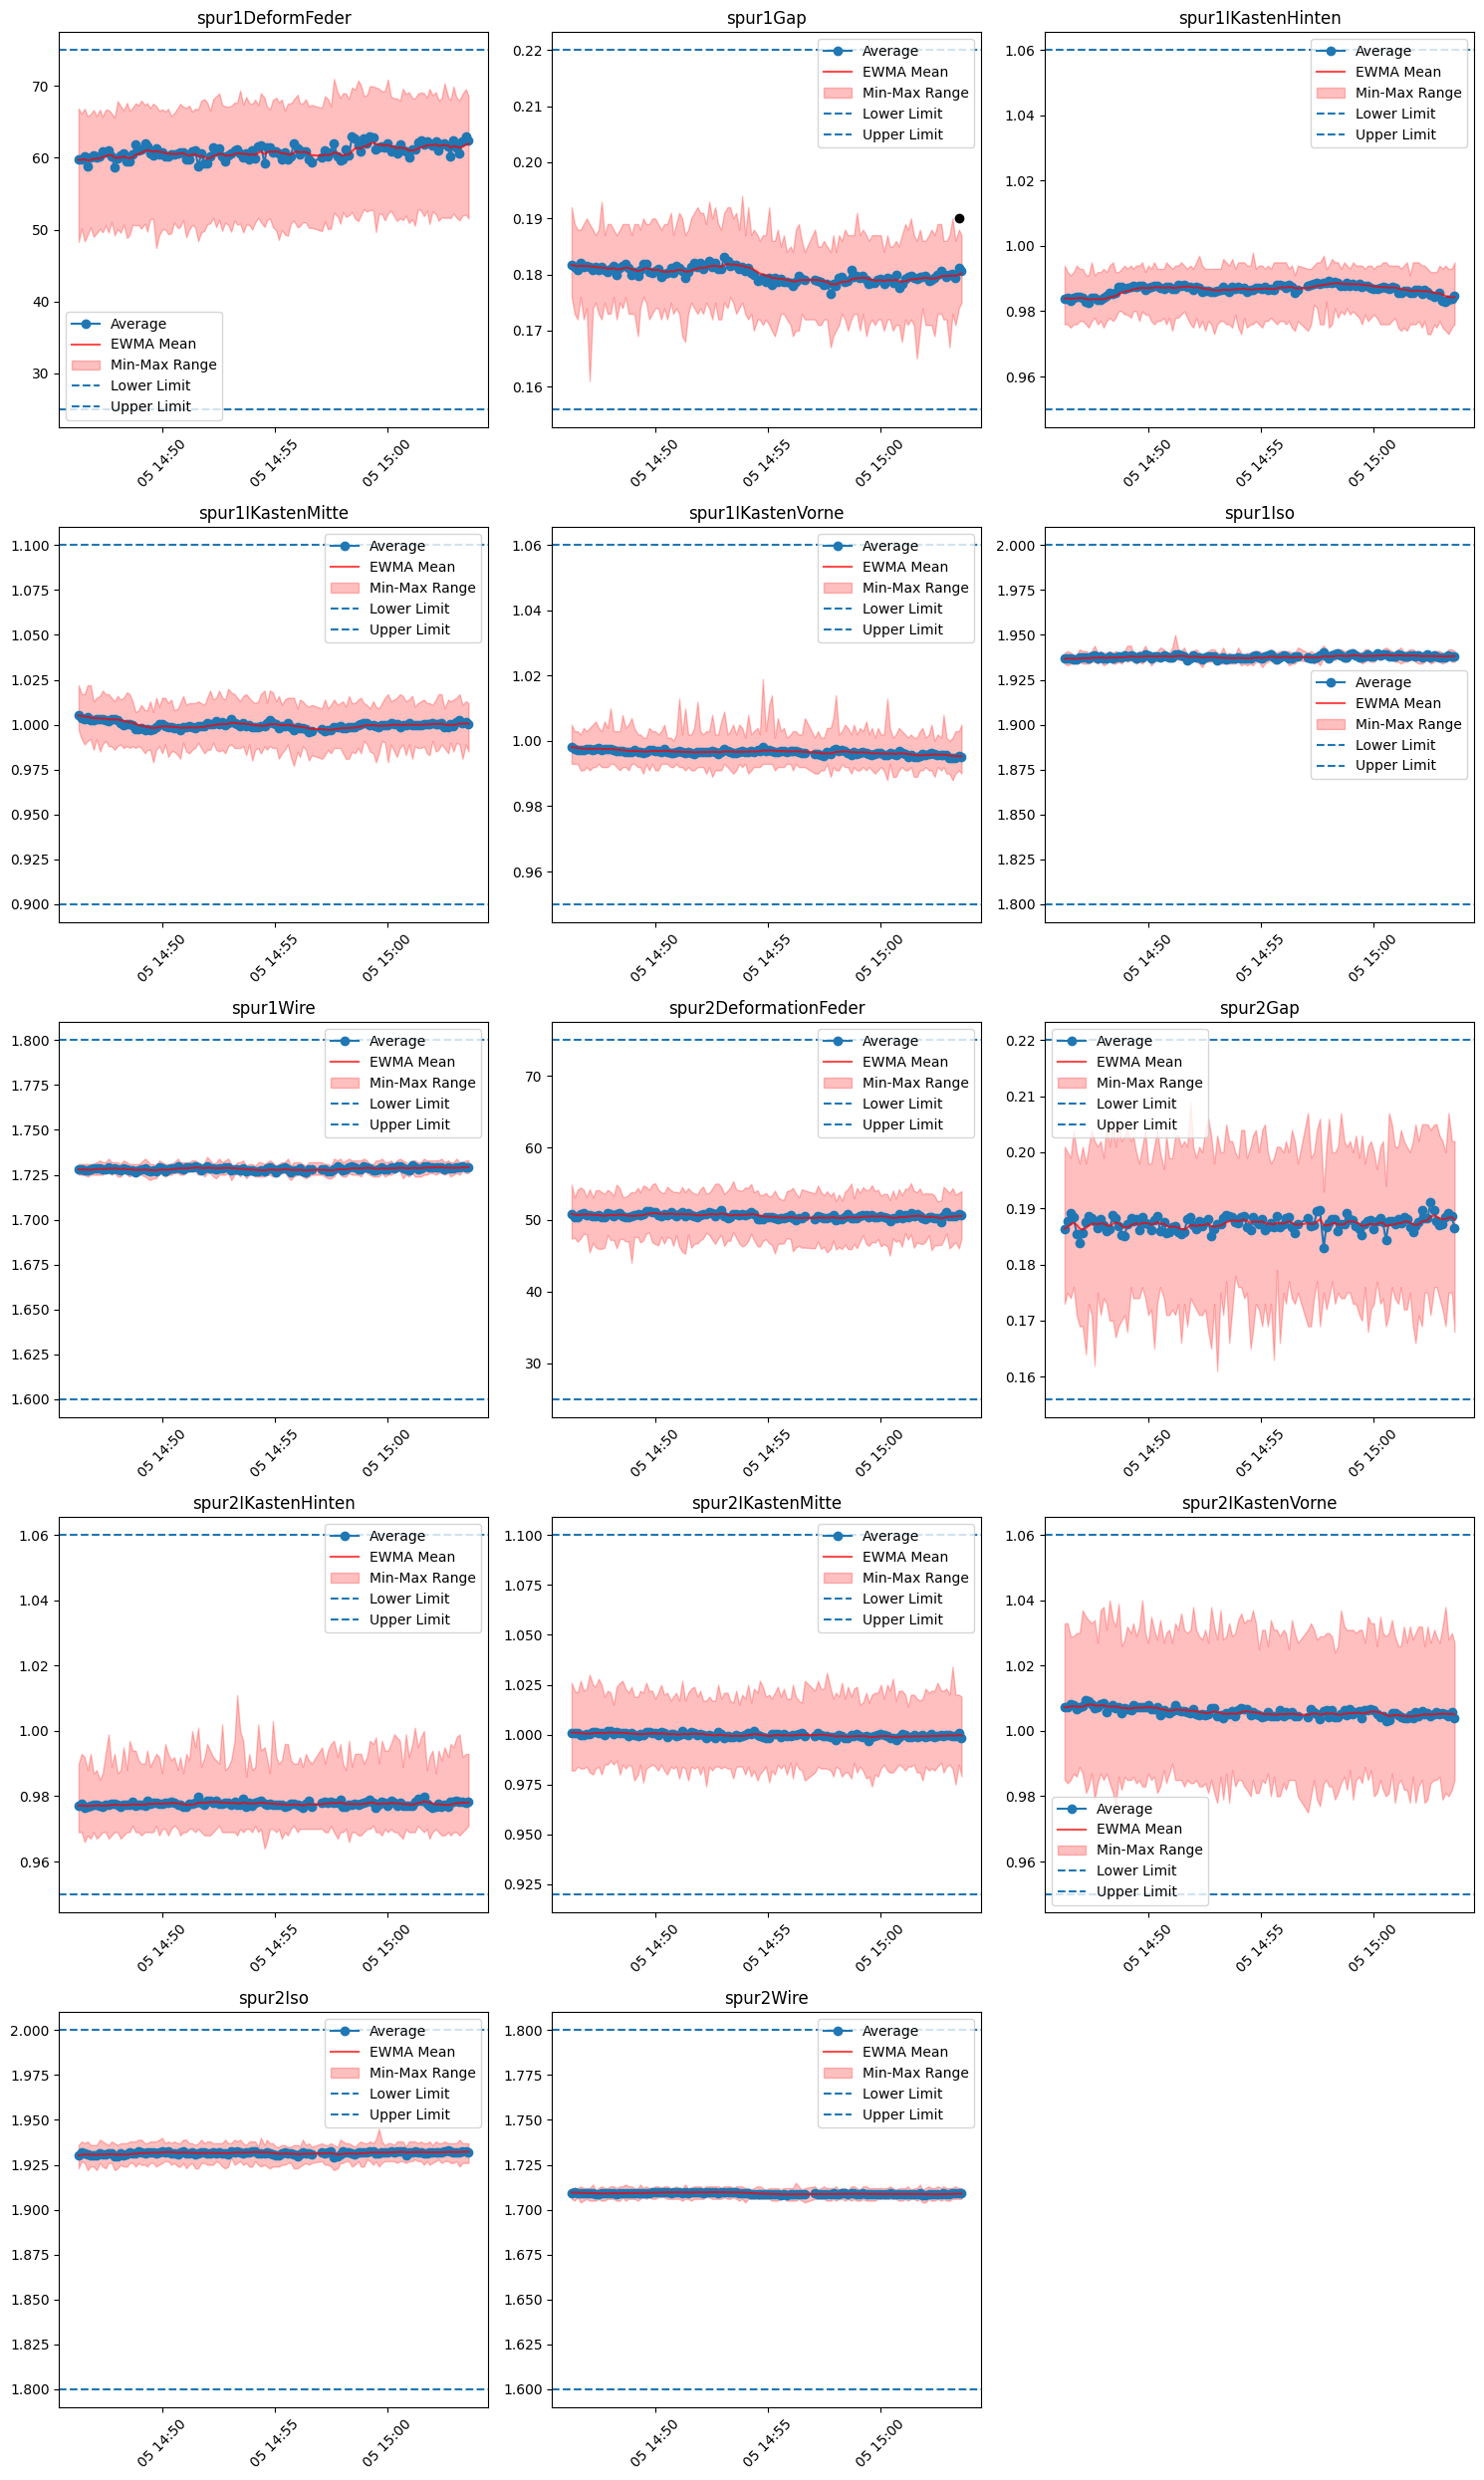

In [124]:
total_vars = sorted(small_d2.variable_name.unique().tolist())
cols = 3
rows = math.ceil(len(total_vars) / cols)

fig_width = 5 * cols  # width per column
fig_height = 5 * rows  # height per row

plt.figure(figsize=(fig_width, fig_height))

for i, var in enumerate(total_vars):
    temp = small_d2[small_d2.variable_name == var]
    temp['ewma_mean'] = temp['average'].ewm(alpha=0.2, adjust=False).mean()
    temp['ewma_std'] = temp['std'].ewm(alpha=0.2, adjust=False).mean()
    
    lowerLimit = temp.lowerLimit.values[0]
    upperLimit = temp.upperLimit.values[0]
    nominalValue = temp.nominalValue.values[0]
    
    time = temp.timestamp
    min_val = temp['min']
    max_val = temp['max']
    
    # Average value plotting
    plt.subplot(rows, cols, i+1)
    plt.plot(temp.timestamp, temp.average, marker = 'o', label='Average')
    plt.plot(temp.timestamp, temp.ewma_mean, label='EWMA Mean', color='red', alpha=0.7)
    
    if var == "spur1Gap":
        plt.scatter(pd.to_datetime("2025-12-05 15:03:30"), 0.19, color='black')
    
    # # Std Dev plotting
    # plt.plot(temp.timestamp, temp['std'], marker = 'o', label='Std Dev', color='green')
    # plt.plot(temp.timestamp, temp.ewma_std, label='EWMA Std', color='purple')
    
    # Min and max value area
    # plt.vlines(x=time, ymin=min_val,ymax=max_val,  linewidth=1)
    plt.fill_between(
        time,
        min_val,
        max_val,
        alpha=0.25,  # transparency
        color='red',
        label='Min-Max Range'
    )   

    # Upper and Lower Limits
    plt.axhline(lowerLimit + nominalValue, linestyle = "--", label="Lower Limit")
    plt.axhline(upperLimit + nominalValue, linestyle="--", label="Upper Limit")
    
    # Timestamp rotate to see it
    plt.xticks(rotation = 45)
    
    # Lables
    plt.title(f"{var}")
    plt.legend()
    # plt.ylim(nominalValue - 1.5*abs(lowerLimit), nominalValue + 1.5*abs(upperLimit))
    # others
plt.tight_layout()
plt.show()
    